In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

* **Remember to sort the indices by .sort_index() for frequently used index.**
* **Use the command .set_index(['ind1', 'ind2'])**

In [6]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### How many movies are listed in the titles dataframe?

In [14]:
len(cast.title)
cast.shape

(3461466, 6)

In [36]:
len(set(cast.title))

165474

### What are the earliest two films listed in the titles dataframe?

In [61]:
sorted_years = sorted(list(set(cast.year)))
sorted_years
bols = lambda x: \
    x == sorted_years[0] or x == sorted_years[1]
    
two_smallest_year_indices = \
    (cast.year == sorted_years[0]) | \
    (cast.year == sorted_years[1])

cast[two_smallest_year_indices].sort('year')

,title,year,name,type,character,n
446038,Miss Jerry,1894,William Courtenay,actor,Mr. Hamilton,NaN
533639,Miss Jerry,1894,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN
2413448,Miss Jerry,1894,Blanche Bayliss,actress,Miss Geraldine Holbrook (Miss Jerry),NaN
1649728,Soldiers of the Cross,1900,Orrie Perry,actor,Lion,NaN
1649879,Soldiers of the Cross,1900,Reg Perry,actor,Lion,NaN


In [60]:
cast.sort('year')

,title,year,name,type,character,n
446038,Miss Jerry,1894,William Courtenay,actor,Mr. Hamilton,NaN
2413448,Miss Jerry,1894,Blanche Bayliss,actress,Miss Geraldine Holbrook (Miss Jerry),NaN
533639,Miss Jerry,1894,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN
1649728,Soldiers of the Cross,1900,Orrie Perry,actor,Lion,NaN
1649879,Soldiers of the Cross,1900,Reg Perry,actor,Lion,NaN
576983,Valsons,1905,Armand Dranem,actor,Himself,NaN
1336080,The Story of the Kelly Gang,1906,Mr. Marshall,actor,Dan Kelly,NaN
736190,The Joe Gans-Battling Nelson Fight,1906,Joe Gans,actor,Himself,1
626255,The Story of the Kelly Gang,1906,Jack (II) Ennis,actor,Steve Hart,NaN
2061145,The Story of the Kelly Gang,1906,E.J. Tait,actor,Extra,NaN


### How many movies have the title "Hamlet"?

In [67]:
str_title = 'Hamlet'
len(set(cast[cast.title == str_title].year))

17

### How many movies are titled "North by Northwest"?

In [68]:
str_title = 'North by Northwest'
len(set(cast[cast.title == str_title].year))

1

### When was the first movie titled "Hamlet" made?

In [108]:
str_title = 'Hamlet'
cast[
    cast.title.str.startswith(str_title)].sort('year').head(1)

,title,year,name,type,character,n
1484213,Hamlet,1910,Jean Mounet-Sully,actor,Hamlet,NaN


### List all of the "Treasure Island" movies from earliest to most recent.

In [84]:
str_title = 'Treasure Island'
df_title_years = cast[['year', 'title']].sort('year')
df_title_years.drop_duplicates()

,year,title
446038,1894,Miss Jerry
1649728,1900,Soldiers of the Cross
576983,1905,Valsons
1336080,1906,The Story of the Kelly Gang
736190,1906,The Joe Gans-Battling Nelson Fight
1177615,1906,Lika mot lika
758219,1907,Robbery Under Arms
2218313,1908,The Fairylogue and Radio-Plays
2735728,1908,Os Guaranis
3069993,1908,Amleto


### How many movies were made in the year 1950?

In [101]:
#sum(df_title_years.year == 1950)
df_unique_title_years = df_title_years.drop_duplicates()
(df_unique_title_years.year == 1950).sum()

893

### How many movies were made in the year 1960?

In [102]:
(df_unique_title_years.year == 1960).sum()

1066

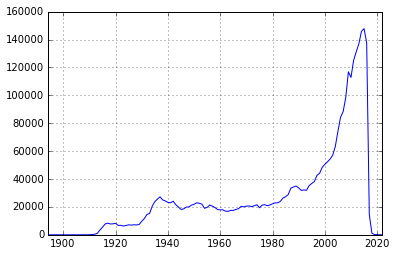

In [129]:
type(df_title_years.year.value_counts())
df_title_years.year.value_counts().sort_index().plot()

### How many movies were made from 1950 through 1959?

In [104]:
year_indices = (1950 <= df_unique_title_years.year) & \
    (df_title_years.year < 1960)
df_unique_title_years[year_indices]

,year,title
3295260,1950,Caged
1430123,1950,Sunset Blvd.
999660,1950,Rustlers on Horseback
1549235,1950,Young Man with a Horn
787063,1950,Sunset in the West
787062,1950,Stage to Tucson
2645499,1950,Twilight in the Sierras
2645498,1950,"Trigger, Jr."
1822427,1950,Gabriela
2147826,1950,Padeniye Berlina


### In what years has a movie titled "Batman" been released?

In [105]:
df_unique_title_years[
    df_unique_title_years.title == 'Batman'].year

2261598    1943
948672     1989
Name: year, dtype: int64

### How many roles were there in the movie "Inception"?

In [139]:
sum(cast[cast.title == 'Inception'].name.value_counts() > 1)
len(cast[cast.title == 'Inception'].name)

76

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [147]:
cast[cast.title == 'Inception'].n.isnull().sum()

25

### But how many roles in the movie "Inception" did receive an "n" value?

In [148]:
cast[cast.title == 'Inception'].n.notnull().sum()

51

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [160]:
cast_n_notnull = cast[cast.n.notnull()].sort(
    'n')
cast_n_notnull[
    cast_n_notnull.title == "North by Northwest"]

,title,year,name,type,character,n
807018,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1
3222981,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2
1348917,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3
2900353,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4
329558,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5
2804151,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6
1569877,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7
1179980,North by Northwest,1959,Martin Landau,actor,Leonard,8
2263630,North by Northwest,1959,Adam Williams,actor,Valerian,9
1676958,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10


### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [165]:
ordered_cast = cast.set_index(['title', 'year'])
cast.head()
ordered_cast.sort_index()

name     type  \
title                          year                                  
#1 Serial Killer               2013         Michael Alton    actor   
                               2013            Aaron Aoki    actor   
                               2013     Zachary (X) Brown    actor   
                               2013        Yvis Cannavale    actor   
                               2013         Patrick Chien    actor   
                               2013       Matthias Chrans    actor   
                               2013       Robert Cicchini    actor   
                               2013        Scott Eriksson    actor   
                               2013          Rane Jameson    actor   
                               2013                Tzi Ma    actor   
                               2013        Thomas McCurdy    actor   
                               2013  Thomas Isao Morinaka    actor   
                               2013            Parry Shen    actor   
                               2013    Eric (II) St. John    actor   
                               2013       Brian Takahashi    actor   
                               2013           Timothy Tau    actor   
                               2013           Jason Tobin    actor   
                               2013            Jesse Wang    actor   
                               2013       Romina Bovolini  actress   
                               2013         Shoshana Bush  actress   
                               2013        Kasie Callaway  actress   
                               2013            Tiley Chao  actress   
                               2013           Cindera Che  actress   
                               2013         Kylee Cochran  actress   
                               2013         Kenzie Dalton  actress   
                               2013       Christie Gaynor  actress   
                               2013         Ellen (II) Ho  actress   
                               2013             Jinxia Ma  actress   
                               2013          Gemma Massot  actress   
                               2013          Eugenia Yuan  actress   
...                                                   ...      ...   
xXx: State of the Union        2005           Masuimi Max  actress   
                               2005            Gwen Mihok  actress   
                               2005          Leyna Nguyen  actress   
                               2005          Oksana Orlan  actress   
                               2005              Lil Rhee  actress   
                               2005          Toni Russell  actress   
                               2005         Jeanne Sakata  actress   
                               2005      Deborah S. Smith  actress   
                               2005         Gina St. John  actress   
                               2005    Paola (III) Torres  actress   
                               2005        Samantha Tyler  actress   
                               2005    Gay-Yee Westerhoff  actress   
xXx: The Return of Xander Cage 2017         H?ctor An?bal    actor   
                               2017       Michael Bisping    actor   
                               2017            Vin Diesel    actor   
                               2017       Andrey Ivchenko    actor   
                               2017              Tony Jaa    actor   
                               2017     Samuel L. Jackson    actor   
                               2017           Vinnie Lota    actor   
                               2017           Rory McCann    actor   
                               2017           Jeremy Omen    actor   
                               2017           Al Sapienza    actor   
                               2017               Kris Wu    actor   
                               2017            Donnie Yen    actor   
                               2017        Jerry A. Ziler    ac

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [170]:
ordered_cast.loc[('Sleuth', 1972)].sort(
    'n', ascending=False)

name     type                   character  n
title  year                                                            
Sleuth 1972        Teddy Martin    actor      Police Constable Higgs  6
       1972  Eve (III) Channing  actress             Marguerite Wyke  5
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
       1972      Alec Cawthorne    actor           Inspector Doppler  3
       1972       Michael Caine    actor                 Milo Tindle  2
       1972    Laurence Olivier    actor                 Andrew Wyke  1

### How many roles were credited in the silent 1921 version of Hamlet?

In [178]:
ordered_cast.loc[('Hamlet', 1921)].shape[0]

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [188]:
ordered_cast.loc[('Hamlet', 1996)].shape[0]

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [193]:
print "Number of Hamlet roles %s" % \
    (ordered_cast.loc[('Hamlet')].shape[0])

Number of Hamlet roles 314


### How many people have played an "Ophelia"?

In [198]:
(ordered_cast.loc['Hamlet'].character == 'Ophelia').sum()

15

### How many people have played a role called "The Dude"?

In [201]:
ordered_role_cast = cast.set_index(('character'))
ordered_role_cast.sort_index()

,title,year,name,type,n
character,,,,,
'Bones',Holes,2003,Edwin Garcia II,actor,NaN
'The Kid',Hello Herman,2012,David Burrus,actor,37
'The Toad',Zig Zag,2002,Oliver Platt,actor,3
1. ruumis,Karvat,1974,Seppo Huunonen,actor,19
A Ming,Ai you lai sheng,2009,Yihong Duan,actor,2
AIDS Patient,Master of Inventions,2012,Nick Rees,actor,NaN
Abel,Dissection of an Olive,2011,Jarrell Roberts,actor,NaN
Achab adulte,Capitaine Achab,2007,Denis Lavant,actor,1
Achu,Annan Thambi,2008,Mammootty,actor,1


### How many people have played a role called "The Stranger"?

In [202]:
ordered_role_cast.head()

,title,year,name,type,n
character,,,,,
Guests,Suuri illusioni,1985,Homo $,actor,22
Himself,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,NaN
Lew-Loc,Menace II Society,1993,Too $hort,actor,27
Bosco,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,3
Himself,Stop Pepper Palmer,2014,Too $hort,actor,NaN


In [205]:
ordered_role_cast.loc[('The Stranger')].shape[0]

203

In [207]:
ordered_role_cast.reset_index('character')

,character,title,year,name,type,n
0,Guests,Suuri illusioni,1985,Homo $,actor,22
1,Himself,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,NaN
2,Lew-Loc,Menace II Society,1993,Too $hort,actor,27
3,Bosco,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,3
4,Himself,Stop Pepper Palmer,2014,Too $hort,actor,NaN
5,Himself,Townbiz,2010,Too $hort,actor,NaN
6,Thug 1,For Thy Love 2,2009,Bee Moe $lim,actor,NaN
7,Actor Playing Eteocles from 'Antigone',Desire (III),2014,Syaiful 'Ariffin,actor,NaN
8,Two Palms - Ua'i Paame,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,8
9,Chico,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,9


### How many roles has Sidney Poitier played throughout his career?

In [213]:
groups = cast.groupby(['name'])

### How many roles has Judi Dench played?

In [214]:
groups.size()

name
!Mystery Girl!             1
$2 Tony                    1
$hutter Boy                4
'Ace Primo' Niko Warren    1
'Ace' Reitman              1
'Agent' Ava Hubbard        1
'Alley Cat' Carrell        1
'Amarillo Slim' Preston    1
'Anela Evans               1
'Angry' Joe Cleary         1
'Ano'ile'a Clemente        1
'Apple' Hamidu             1
'Arm' Suvinit Pornvalai    1
'Astor' Escobar            1
'Atlas' Ramachandran       3
...
Zziwa Ddungu               1
d'Armans                   1
dL Sams                    4
de Kerdec                  1
de Yao                     1
deMann                     2
du'Vall Gibson             1
el Khatib Vincent          1
gregg Alexander            1
heather Matthews-Yanoff    2
jay Thompson               1
juan Shannon               1
k.d. lang                  4
kim Punkrock               4
layne Schildroth           1
Length: 1261060, dtype: int64

In [215]:
groups.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9


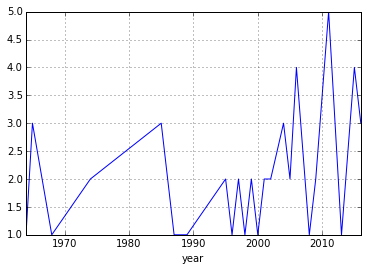

In [221]:
t = cast[cast.name == "Judi Dench"].groupby(['year'])
t.size().plot()

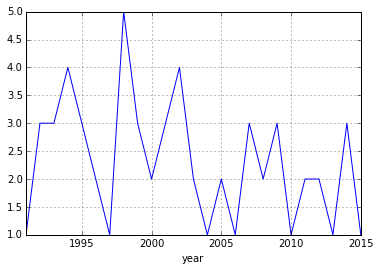

In [228]:
#cast[cast.name.str.contains('Philip Seymour')].name.drop_duplicates()
t = cast[cast.name == "Philip Seymour Hoffman"].groupby(['year'])
t.size().plot()

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

Rest of the questions follow a similar pattern

### List the leading roles that Cary Grant played in the 1940s in order by year.

### How many roles were available for actors in the 1950s?

### How many roles were avilable for actresses in the 1950s?

### How many leading roles (n=1) were available from the beginning of film history through 1980?

### How many non-leading roles were available through from the beginning of film history through 1980?

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?